Boost FFNN MSE: 0.0126
HFAC FFNN MSE: 0.2999
Active Return FFNN MSE: 0.0067
Return Damping FFNN MSE: 0.0113


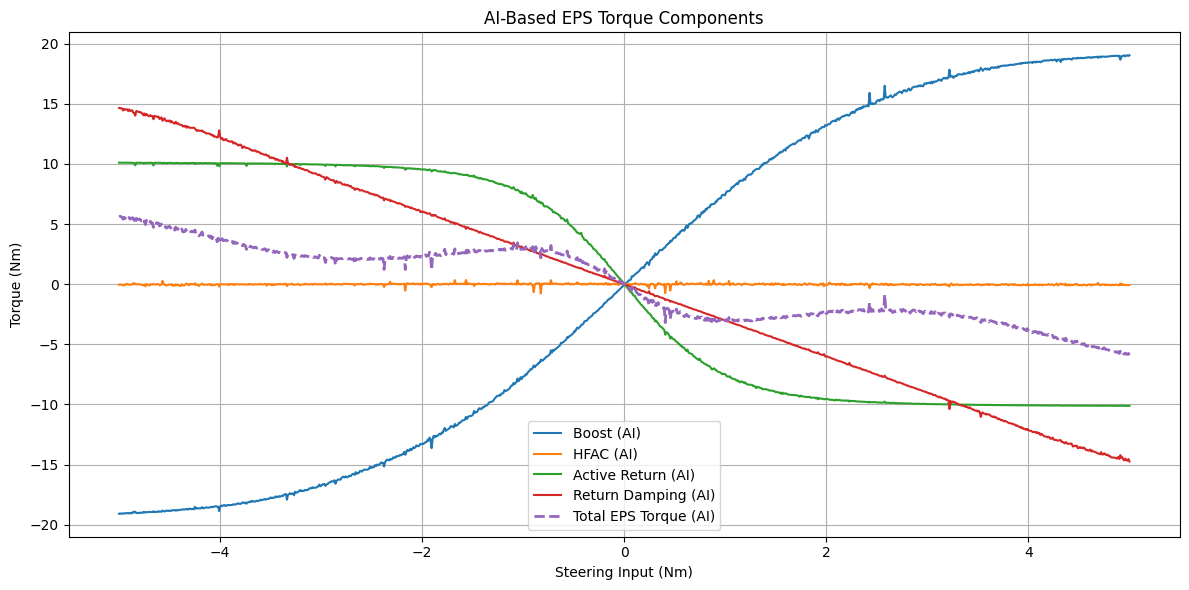

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Simulate EPS data
np.random.seed(0)
n_samples = 1000

steering_input = np.linspace(-5, 5, n_samples)
vehicle_speed = np.random.uniform(0, 120, n_samples)         # km/h
steering_rate = np.random.uniform(-2, 2, n_samples)          # rad/s

def boost_curve(x): return 20 * np.tanh(0.4 * x)
def hfac(x): return -2.5 * np.sin(5 * x) * np.exp(-np.abs(x))
def arc(x): return -10 * np.tanh(x)
def damping(x): return -3 * x

boost = boost_curve(steering_input)
hfac_val = hfac(steering_input)
active_return = arc(steering_input)
return_damping = damping(steering_input)
total_eps_torque = boost + hfac_val + active_return + return_damping

data = pd.DataFrame({
    'steering_input': steering_input,
    'vehicle_speed': vehicle_speed,
    'steering_rate': steering_rate,
    'boost': boost,
    'hfac': hfac_val,
    'active_return': active_return,
    'return_damping': return_damping,
    'total_torque': total_eps_torque
})

X = data[['steering_input', 'vehicle_speed', 'steering_rate']]

# Step 2–4: Train FFNNs for each component and predict
def train_ffnn(X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='tanh', max_iter=1000, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} FFNN MSE: {mse:.4f}")
    return model.predict(X)

# Train and predict each component
boost_pred = train_ffnn(X, data['boost'], "Boost")
hfac_pred = train_ffnn(X, data['hfac'], "HFAC")
arc_pred = train_ffnn(X, data['active_return'], "Active Return")
damp_pred = train_ffnn(X, data['return_damping'], "Return Damping")

# Total predicted EPS torque
eps_total_pred = boost_pred + hfac_pred + arc_pred + damp_pred

# Step 5: Visualization
plt.figure(figsize=(12, 6))
plt.plot(data['steering_input'], boost_pred, label='Boost (AI)')
plt.plot(data['steering_input'], hfac_pred, label='HFAC (AI)')
plt.plot(data['steering_input'], arc_pred, label='Active Return (AI)')
plt.plot(data['steering_input'], damp_pred, label='Return Damping (AI)')
plt.plot(data['steering_input'], eps_total_pred, label='Total EPS Torque (AI)', linewidth=2, linestyle='--')
plt.title('AI-Based EPS Torque Components')
plt.xlabel('Steering Input (Nm)')
plt.ylabel('Torque (Nm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
